In [3]:
pip install geneticalgorithm

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15079 sha256=82f5c7feb4b6c9e8f037e76db0d88d4106d03260811b5c874a1d28a1e13cc232
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [4]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [16]:
list1 =np.array([100, 80, 90, 70, 60])
list2 = np.array([180, 190, 200, 210, 220])
list3 = np.array([230, 250, 270, 290, 310])
list4 = np.array([300, 290, 270, 260, 250])
list5 = np.array([130, 150, 170, 190, 210])

In [23]:
for i in range(5):
  print(i)

0
1
2
3
4


In [106]:
sum(list1 * 0.2 + list2 * 0.2 + list3 * 0.2 + list4 * 0.2 + list5 * 0.2) / 5 # baseline 

1400

In [107]:
sum(list1)

400

In [108]:
sum(list2)

1000

In [146]:
def evaluate(X):
  pen = 0 
  coef = [0,0,0,0,0]
  
  #print(X)
  if sum(X) > 9900 and sum(X) < 10000:
    coef[0] = X[0] / 10000
    coef[1] = X[1] / 10000
    coef[2] = X[2] / 10000
    coef[3] = X[3] / 10000
    coef[4] = X[4] / 10000
    print("\n ** A ** \n")
    sum(coef)
    #pen = 2000 - sum(list1 * coef[0] + list2 * coef[1] + # 400 = 혈당측정기에서 수집한 EGV의 최댓값이 400
    #             list3 * coef[2] + list4 * coef[3] +
    #             list5 * coef[4])
    pen = 400 - (sum(list1 * (X[0] / 10000) + list2 * (X[1] / 10000) +
                 list3 * (X[2] / 10000) + list4 * (X[3] / 10000) +
                 list5 * (X[4] / 10000))) / 5
    
    print("\n ** B ** \n")
    print(X)
    #print(pen)
    print("\n ** C ** \n")
    print(pen)
  #return np.sum(X) + pen
  return -pen
    
    

In [110]:
def evaluate2(X):
  pen = 0 
  coef = []
  
  #print(X)
  if sum(X) >  0.98 and sum(X) < 1:
    print("A \n")
    print(X)
    # 400 = 혈당측정기에서 수집한 EGV의 최댓값이 400
    pen = 500 - sum(list1 * X[0] + list2 * X[1]+ 
                 list3 * X[2]  + list4 * X[3]  +
                 list5 * X[4] )
    print("B \n")
    print(list1 * X[0])
    print("C \n")
    print(pen)
  return np.sum(X) + pen
    
    

In [124]:
varbound = np.array([[1000,5000]]*5)

In [125]:
test = np.array([[0.1,0.5]]*5)

In [126]:
algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [147]:
model = ga(function = evaluate, dimension = 5, variable_type='int',variable_boundaries=varbound,algorithm_parameters = algorithm_param)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
251.78159999999997

 ** A ** 


 ** B ** 

[4990. 1106. 1110. 1001. 1713.]

 ** C ** 

251.44160000000002

 ** A ** 


 ** B ** 

[4990. 1089. 1110. 1001. 1713.]

 ** C ** 

251.78159999999997

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001. 1713.]

 ** C ** 

251.8216

 ** A ** 


 ** B ** 

[4990. 1089. 1110. 1043. 1713.]

 ** C ** 

250.6308

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001. 1713.]

 ** C ** 

251.8216

 ** A ** 


 ** B ** 

[4990. 1106. 1110. 1001. 1713.]

 ** C ** 

251.44160000000002

 ** A ** 


 ** B ** 

[4990. 1089. 1110. 1001. 1713.]

 ** C ** 

251.78159999999997

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001. 1713.]

 ** C ** 

251.8216

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001. 1713.]

 ** C ** 

251.8216

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001. 1713.]

 ** C ** 

251.8216

 ** A ** 


 ** B ** 

[4990. 1089. 1110. 1001. 1713.]

 ** C ** 

251.78159999999997

 ** A ** 


 ** B ** 

[4990. 1087. 1110. 1001.

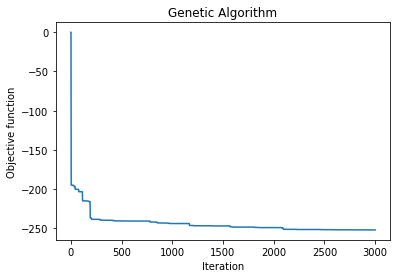

In [148]:
model.run()